###### K-Means图片颜色点分类

In [1]:
from sklearn.datasets import load_sample_image

<IPython.core.display.Javascript object>

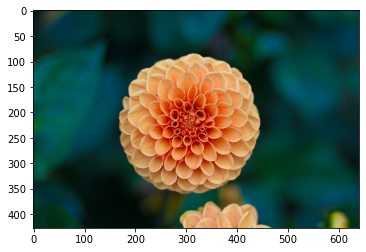

In [2]:
# image_name : {`china.jpg`, `flower.jpg`}
flower = load_sample_image('flower.jpg')

plt.imshow(flower)

In [3]:
flower.shape

(427, 640, 3)

In [4]:
flower

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)

In [6]:
# 保存图片
plt.imsave('image/flower.png', flower)

<IPython.core.display.Javascript object>

###### 保留主要的颜色，使用聚类成64种

In [8]:
# 随机获取1000个图片中的颜色, 进行训练
# 427 * 640 = 273280
# 总共有27万多个颜色点
data = flower.reshape(-1, 3)
data.shape

(273280, 3)

In [9]:
data

array([[ 2, 19, 13],
       [ 3, 18, 13],
       [ 7, 20, 13],
       ...,
       [ 7, 46, 28],
       [ 8, 45, 28],
       [ 9, 43, 27]], dtype=uint8)

In [10]:
from sklearn.utils import shuffle

In [11]:
# 拷贝data
data2 = data.copy()

# 打乱data2, 然后取前1000个： 就是随机的1000个颜色点
data3 = shuffle(data2)[:1000]
data3

array([[  0,  48,  50],
       [216, 182, 119],
       [  0,  60,  61],
       ...,
       [  0,  73,  66],
       [  0,  14,  14],
       [232, 157, 102]], dtype=uint8)

In [12]:
data3.shape

(1000, 3)

###### 使用KMeans进行聚类

In [13]:
# kmeans对象
kmeans = KMeans(n_clusters=64)  # 64组，每一组就是一个颜色

# 训练
kmeans.fit(data3)  

<IPython.core.display.Javascript object>

KMeans(n_clusters=64)

In [15]:
# 分类结果，标签
labels = kmeans.labels_
labels

array([63, 49, 14, 11,  6,  3, 26, 51, 27,  3, 18, 12, 42,  3, 22, 18, 38,
       41,  1, 47, 20, 60, 31, 27, 63,  0,  3, 33, 16, 27,  8, 20, 23,  3,
       56, 20, 21, 44, 15, 53, 14, 14,  6,  3, 23, 53, 19, 49, 41, 47, 63,
       38, 61, 31, 15, 18, 20,  6, 26, 12, 28, 47, 41, 56, 46, 26, 41,  8,
       54, 14, 41, 41,  0, 58, 19,  9, 47, 36,  0, 14, 27, 47, 41, 20, 26,
       42,  8, 20, 54, 10, 63, 41, 63, 29, 37,  5, 58, 20, 63, 42, 44, 27,
       41, 56, 41, 41, 41, 26, 27,  1, 58,  3,  3,  3, 12, 20, 18, 47, 47,
       58, 20, 20, 43,  8, 47, 12,  8, 44,  4, 53, 43, 61, 36,  1, 20, 52,
       59, 36, 23, 52,  7, 48, 52,  8, 15, 58, 44, 20, 20, 53,  8,  3, 19,
       41, 15, 45,  1, 47, 53,  3, 18, 26, 22, 53, 47, 39, 34, 15,  5, 56,
        3, 20, 56, 53, 63, 14, 58, 16, 14, 48, 56,  3, 51,  3, 53,  1,  3,
       20,  1, 47, 20, 27,  5, 23,  8, 27, 24,  8,  8,  9, 26, 15, 53, 31,
       61,  3,  9,  1,  1, 26, 36, 36, 19, 58, 37,  3, 57, 49, 22, 41, 28,
       31, 54,  2, 27, 16

In [16]:
data.shape, data3.shape

((273280, 3), (1000, 3))

In [17]:
# 预测27万个颜色点所属的分类是哪一个（0-63）

# 对data（273280条）数据预测，得到273280个结果
labels = kmeans.predict(data)
display(labels.shape, labels)


(273280,)

array([56, 56, 56, ..., 31, 31, 31])

In [19]:
# 接下来我们用每一组的聚类中心点 来 替换该组的所有颜色点
# 64组，有64个聚类中心点

centers = kmeans.cluster_centers_
centers.shape

(64, 3)

In [20]:
centers[labels].shape, centers[labels]

((273280, 3),
 array([[ 2.19354839, 18.4516129 , 14.32258065],
        [ 2.19354839, 18.4516129 , 14.32258065],
        [ 2.19354839, 18.4516129 , 14.32258065],
        ...,
        [ 4.        , 49.        , 24.29411765],
        [ 4.        , 49.        , 24.29411765],
        [ 4.        , 49.        , 24.29411765]]))

In [21]:
# 新的图
flower2 = centers[labels].reshape(427, 640, 3) 
flower2.shape, flower2

((427, 640, 3),
 array([[[ 2.19354839, 18.4516129 , 14.32258065],
         [ 2.19354839, 18.4516129 , 14.32258065],
         [ 2.19354839, 18.4516129 , 14.32258065],
         ...,
         [ 1.08695652, 76.95652174, 59.13043478],
         [ 1.08695652, 76.95652174, 59.13043478],
         [ 1.08695652, 76.95652174, 59.13043478]],
 
        [[ 2.19354839, 18.4516129 , 14.32258065],
         [ 2.19354839, 18.4516129 , 14.32258065],
         [ 2.19354839, 18.4516129 , 14.32258065],
         ...,
         [ 1.08695652, 76.95652174, 59.13043478],
         [ 0.73529412, 71.55882353, 68.32352941],
         [ 0.73529412, 71.55882353, 68.32352941]],
 
        [[ 2.19354839, 18.4516129 , 14.32258065],
         [ 2.19354839, 18.4516129 , 14.32258065],
         [ 2.19354839, 18.4516129 , 14.32258065],
         ...,
         [ 0.73529412, 71.55882353, 68.32352941],
         [ 0.73529412, 71.55882353, 68.32352941],
         [ 0.73529412, 71.55882353, 68.32352941]],
 
        ...,
 
        [[ 6.     

<IPython.core.display.Javascript object>

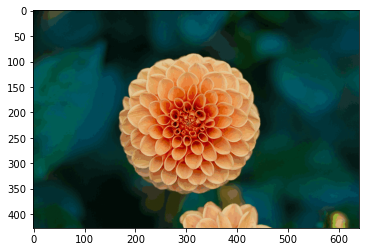

In [22]:
#  input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
flower3 = flower2 / 255

# 显示新的图: 只保留了64种颜色
plt.imshow(flower3) 

In [23]:
plt.imsave('image/flower64.png', flower3)

<IPython.core.display.Javascript object>

 - 以下是压缩前后大小对比

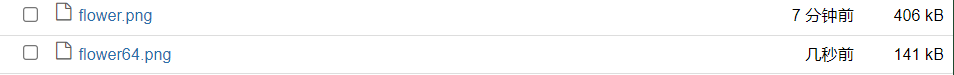